In [1]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import sys
sys.path.append('..')

'''
Graphs and highlights taken from explore.ipynb, of tables {'cases', 'documents', 'points', 'services', 'topics'} dumped Dec 21st '22

Service - website, app, etc.
Point - a plain text highlight that summarizes as aspect of their policy. It is often a quote, but doesn't have to be, 
    e.g. "The terms for this service are easy to read". Each point is 1-1 with a Case.
Case - higher-level Service-agnostic patterns that Points exhibit. For example, "No third-party analytics or tracking platforms are used"
Topic - even higher-level patterns, that contain a handful of Cases. For example, "User Choice"
Document - crawled text from a Service
'''

'\nGraphs and highlights taken from explore.ipynb, of tables {\'cases\', \'documents\', \'points\', \'services\', \'topics\'} dumped Dec 21st \'22\n\nService - website, app, etc.\nPoint - a plain text highlight that summarizes as aspect of their policy. It is often a quote, but doesn\'t have to be, \n    e.g. "The terms for this service are easy to read". Each point is 1-1 with a Case.\nCase - higher-level Service-agnostic patterns that Points exhibit. For example, "No third-party analytics or tracking platforms are used"\nTopic - even higher-level patterns, that contain a handful of Cases. For example, "User Choice"\nDocument - crawled text from a Service\n'

In [2]:
VERSION = '211222'
cases = pickle.load(open(f'../data/cases_{VERSION}_clean.pkl', 'rb'))
documents = pickle.load(open(f'../data/documents_{VERSION}_clean.pkl', 'rb'))
points = pickle.load(open(f'../data/points_{VERSION}_clean.pkl', 'rb'))
services = pickle.load(open(f'../data/services_{VERSION}_clean.pkl', 'rb'))
topics = pickle.load(open(f'../data/topics_{VERSION}_clean.pkl', 'rb'))

In [3]:
services.info()
services.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5754 entries, 225 to 7107
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           5754 non-null   int64         
 1   name                         5754 non-null   object        
 2   url                          5754 non-null   object        
 3   created_at                   5754 non-null   datetime64[ns]
 4   updated_at                   5754 non-null   datetime64[ns]
 5   wikipedia                    5742 non-null   object        
 6   keywords                     264 non-null    object        
 7   related                      265 non-null    object        
 8   slug                         5754 non-null   object        
 9   is_comprehensively_reviewed  5754 non-null   bool          
 10  user_id                      1120 non-null   float64       
 11  rating                       5754 non-nul

,id,name,url,created_at,updated_at,wikipedia,keywords,related,slug,is_comprehensively_reviewed,user_id,rating
id,,,,,,,,,,,,
225,225,Spotify,"spotify.com,spotifyforvendors.com,spotifyjobs.com",2018-01-16 15:26:06.332058,2021-03-25 03:19:30.801812,https://en.wikipedia.org/wiki/Spotify,,soundcloud,spotify,True,NaN,E
183,183,CouchSurfing,"couchsurfing.org,couchsurfing.com",2018-01-16 15:26:05.544807,2021-03-25 03:19:31.618318,https://en.wikipedia.org/wiki/CouchSurfing,,,couchsurfing,True,NaN,E
219,219,Instagram,"instagram.com,help.instagram.com,about.instagr...",2018-01-16 15:26:06.211757,2021-03-25 03:19:31.833924,https://en.wikipedia.org/wiki/Instagram,,,instagram,True,NaN,E
186,186,Flickr,flickr.com,2018-01-16 15:26:05.601101,2021-03-25 03:19:32.888517,https://en.wikipedia.org/wiki/Flickr,"photos,pictures","twitpic,500px",flickr,True,NaN,E
330,330,SeenThis,seenthis.net,2018-03-05 08:40:47.818036,2021-03-25 03:19:33.465435,None,None,"twitter,status-net",seenthis,False,NaN,A


Text(0.5, 1.0, 'Services added over time')

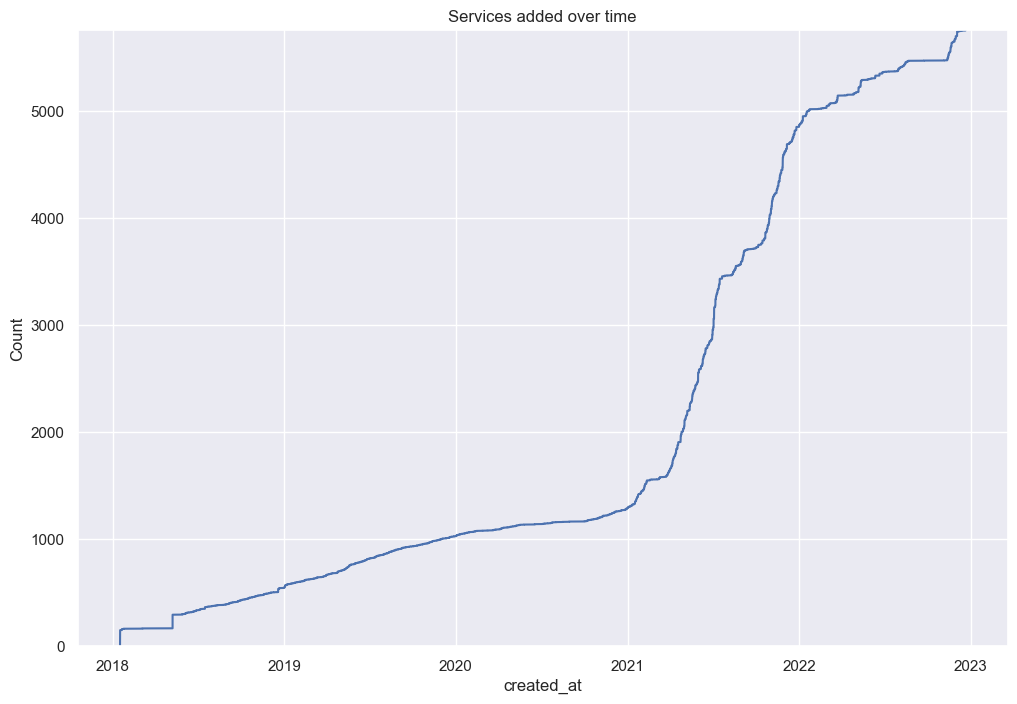

In [4]:
# How have the number of Services grown over time?
plt.figure(figsize=(12,8))
sns.ecdfplot(services, x='created_at', stat='count')
plt.title('Services added over time')

In [5]:
# How many have been comprehensively reviewed?
services.is_comprehensively_reviewed.value_counts()

False    5325
True      429
Name: is_comprehensively_reviewed, dtype: int64

Text(0.5, 1.0, 'Service ratings')

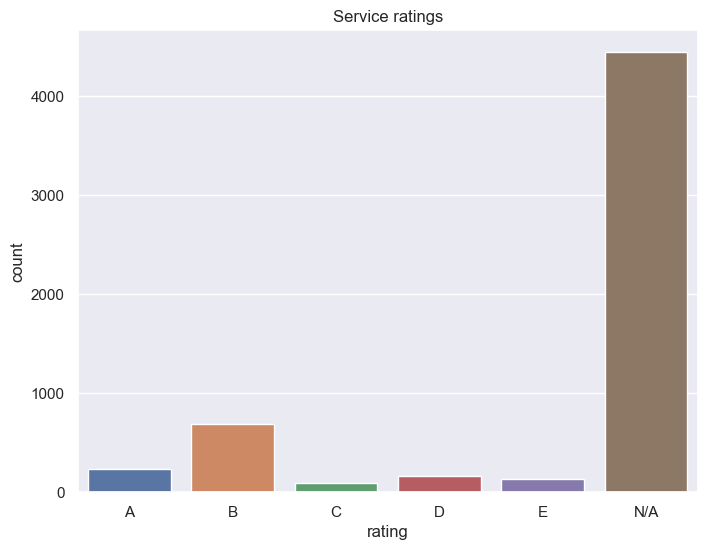

In [6]:
# What are they rated?
plt.figure(figsize=(8,6))
sns.countplot(x=services.rating, order=['A', 'B', 'C', 'D', 'E', 'N/A'])
plt.title('Service ratings')

In [7]:
documents.info()
documents.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9786 entries, 1149 to 330
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              9786 non-null   int64         
 1   name            9786 non-null   object        
 2   url             9786 non-null   object        
 3   xpath           9507 non-null   object        
 4   text            9786 non-null   object        
 5   created_at      9786 non-null   datetime64[ns]
 6   updated_at      9786 non-null   datetime64[ns]
 7   service_id      9786 non-null   int64         
 8   reviewed        218 non-null    object        
 9   user_id         3987 non-null   float64       
 10  crawler_server  6290 non-null   object        
 11  lang            9759 non-null   object        
 12  doc_len         9786 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 1.0+ MB


,id,name,url,xpath,text,created_at,updated_at,service_id,reviewed,user_id,crawler_server,lang,doc_len
id,,,,,,,,,,,,,
1149,1149,social.privacytools.io Privacy Policy,https://social.privacytools.io/terms,/html/body/div/div[2]/div/div[1]/div,\nPrivacy <p>Please review our privacy stateme...,2019-04-06 02:39:01.465351,2020-12-14 19:29:56.243824,1472,None,NaN,None,en,2940.0
1136,1136,Privacy Policy,https://www.privacytools.io/privacy-policy/,/html/body/div/main,<ol>\n<li>\n<i>\n</i> Home </li>\n<li> Privac...,2019-03-31 20:35:03.776236,2020-12-14 21:32:47.849675,1472,None,NaN,None,en,7542.0
2123,2123,Privacy Policy,https://mrichard333.com/Privacy-policy,,<ul>\n<li>Home</li>\n<li>Videos</li>\n<li>Con...,2019-11-11 16:04:52.941473,2020-12-15 00:51:52.643832,1728,None,3877.0,None,en,8720.0
3719,3719,Privacy Policy,https://www.savvasrealize.com/privacy/corporat...,/html/body/main/div/section/div/div/div[1],Privacy Policy We recently updated our Privac...,2021-01-21 11:15:08.988939,2021-01-24 08:49:24.411559,2619,None,20760.0,None,en,20850.0
3720,3720,Terms of Use,https://www.savvasrealize.com/userAgreement.html,/html/body/div/div[3]/div,<p>\n<strong>TERMS OF USE</strong>\n<br>\n<br...,2021-01-21 11:16:32.273127,2021-01-24 09:52:27.304527,2619,None,20760.0,None,en,17992.0


In [8]:
# Most common Document names
documents.name.value_counts().head(15)

Privacy Policy          2658
Terms of Service         881
Terms of Use             558
Terms and Conditions     299
Cookie Policy            272
Privacy Policy           260
Terms                    211
 Privacy Policy          142
Terms & Conditions       125
Privacy policy           113
Privacy                   92
PRIVACY POLICY            89
Privacy Statement         77
Privacy Notice            69
Terms of Use              52
Name: name, dtype: int64

In [9]:
# Document languages
documents.lang.value_counts()

en       9162
de        147
fr        121
nl         44
it         44
es         42
zh-cn      38
ru         27
ja         15
ca         14
ko         13
pt         12
ro         11
el          9
pl          9
no          7
tr          5
id          4
et          4
sv          4
bg          4
cs          4
da          4
ar          3
th          2
fi          2
cy          2
hu          2
he          2
hr          1
tl          1
Name: lang, dtype: int64

count      9786.000000
mean      21482.551400
std       29203.469787
min           1.000000
25%        6119.000000
50%       14719.500000
75%       28367.000000
max      830858.000000
Name: doc_len, dtype: float64


Text(0.5, 1.0, 'Document length (num characters)')

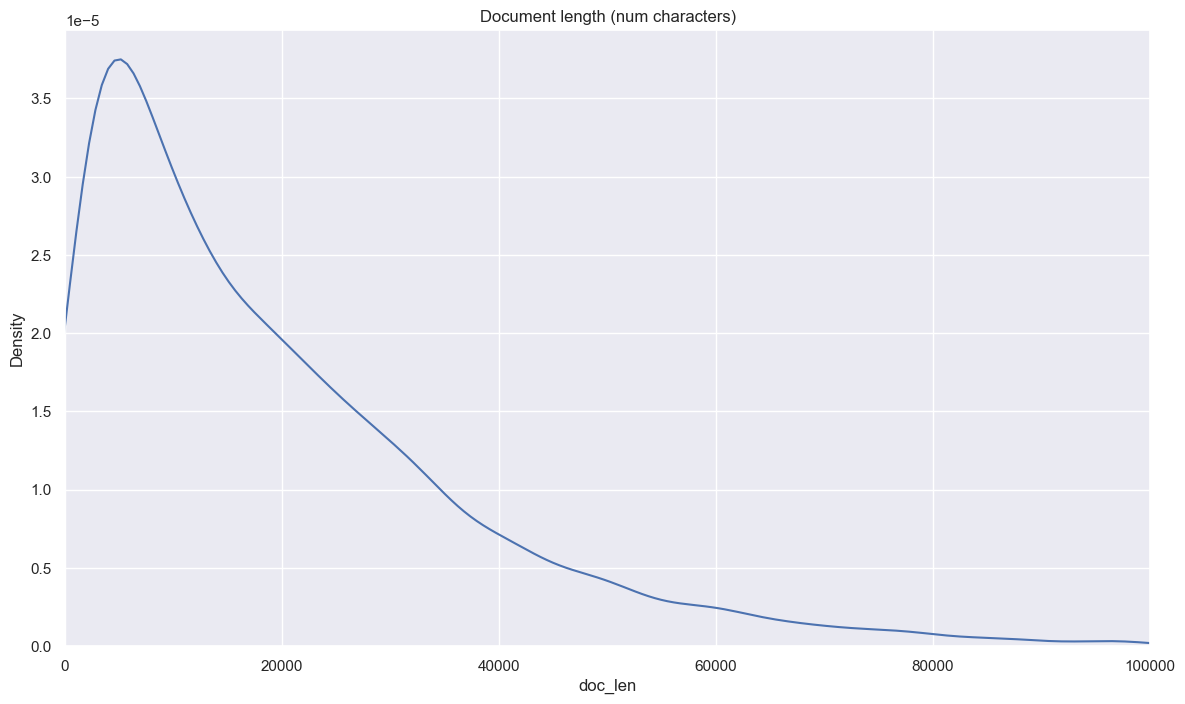

In [10]:
# Document lengths
documents['doc_len'] = documents.text.str.len()
print(documents.doc_len.describe())

# Graph the density (with outliers filtered so the x-axis is not stretched)
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim((0,100000))
sns.kdeplot(documents.doc_len[documents.doc_len < 100000], ax=ax)
plt.title('Document length (num characters)')

In [11]:
# Not sure what `reviewed` is based on, but most values are null/NaN
documents.reviewed.value_counts()

True     147
False     71
Name: reviewed, dtype: int64

In [12]:
documents.crawler_server.value_counts()

eu                                  3122
nosypeeper                           753
atlas                                743
us                                   733
avidreader                           518
nosypeeper.crawler.api.tosdr.org     128
arachne                              111
eu.crawler.api.tosdr.org              69
floppy                                59
floppy.crawler.api.tosdr.org          20
whale                                 12
arachne.crawler.api.tosdr.org          7
james                                  6
us-east.crawler.api.tosdr.org          5
atlas.crawler.api.tosdr.org            1
dmitri                                 1
avidreader.crawler.api.tosdr.org       1
eu-central.crawler.api.tosdr.org       1
Name: crawler_server, dtype: int64

In [13]:
# Do a join to attach Service info to Documents
documents = pd.merge(documents, services, left_on='service_id', right_index=True, suffixes=['_doc', '_service'])

In [14]:
# Most Services have 1 or 2 documents, but some have a lot more
print(f"Documents per Service stats:\n{documents.service_id.value_counts().describe()}")
documents.groupby(['service_id', 'name_service']).size().sort_values(ascending=False).head(15)

Documents per Service stats:
count    4713.000000
mean        2.076384
std         1.265020
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        25.000000
Name: service_id, dtype: float64


service_id  name_service                       
190         Amazon                                 25
1559        HERE Technologies                      19
3133        SailPoint                              18
1448        TikTok                                 17
3918        Optimum                                14
2308        Rakuten                                14
230         PayPal                                 13
3917        Rise Broadband                         12
2887        Albertsons Companies,(Subsidiaries)    12
312         Stack Overflow                         11
186         Flickr                                 11
1566        Intercom                               11
6730        NixNet                                 10
284         JustPark                                9
389         Lumen (Century Link)                    9
dtype: int64

In [15]:
topics.head()

,id,title,subtitle,description,created_at,updated_at,oldId
id,,,,,,,
27,27,Ownership,What happens with the content you generate on ...,The content and the data you generate on servi...,2018-01-16 15:26:04.444207,2018-01-16 15:26:04.444207,ownership
31,31,Governance,Your relationship with the service and the com...,description,2018-01-16 15:26:04.535299,2018-01-16 15:26:04.535299,governance
32,32,Guarantee,Some services will guarantee you certain featu...,description,2018-01-16 15:26:04.551182,2018-01-16 15:26:04.551182,guarantee
35,35,User Involvement in Changing Terms,Are changes proposed as a request for feedback...,"The terms are a contract between two parties, ...",2018-01-16 15:26:04.629039,2018-01-16 15:26:04.629039,changes-involvement
38,38,Changes,Changes to the Terms,description,2018-01-16 15:26:04.682205,2018-01-16 15:26:04.682205,changes


In [16]:
print(cases.info())
print(f"\nScore:\n{cases.score.describe()}")
cases.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 175 to 178
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               245 non-null    int64         
 1   classification   245 non-null    object        
 2   score            245 non-null    int64         
 3   title            245 non-null    object        
 4   description      245 non-null    object        
 5   topic_id         245 non-null    int64         
 6   created_at       245 non-null    datetime64[ns]
 7   updated_at       245 non-null    datetime64[ns]
 8   privacy_related  78 non-null     object        
 9   docbot_regex     62 non-null     object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 21.1+ KB
None

Score:
count    245.000000
mean      36.918367
std       22.993082
min        0.000000
25%       20.000000
50%       40.000000
75%       50.000000
max      100.000000
Name: score, d

,id,classification,score,title,description,topic_id,created_at,updated_at,privacy_related,docbot_regex
id,,,,,,,,,,
175,175,good,50,You can delete your content from this service,You can ask the service to remove your content...,45,2018-01-16 15:26:09.452580,2021-02-27 14:23:56.238878,None,NaN
130,130,bad,50,A license is kept on user-generated content ev...,The service may still use your content and dis...,30,2018-01-16 15:26:08.388050,2021-05-06 08:26:06.196896,True,NaN
129,129,bad,60,This service tracks you on other websites,The service may use tracking technologies in t...,25,2018-01-16 15:26:08.370367,2021-02-24 22:56:35.859683,True,NaN
237,237,neutral,0,You agree to comply with the law of the servic...,"By using the service, you agree to comply with...",28,2018-07-22 09:09:08.496243,2021-05-06 08:35:07.855459,None,NaN
173,173,bad,25,This service retains rights to your content ev...,The service may still use your content and dis...,45,2018-01-16 15:26:09.415729,2021-02-27 15:51:22.501620,None,NaN


In [17]:
# What do the regexes look like?
# Many were empty string instead of NaN/None, so replace those and see how many are left
cases.docbot_regex = cases.docbot_regex.replace('', np.nan)
print(cases.docbot_regex.dropna().head(15))
print(f"\n{len(cases.docbot_regex.dropna())} out of {len(cases)} have regex")

id
146     ^((?=.*indemnify))((?=.*defend))((?=.*harmless))
147                  ^((?=.*survive))((?=.*termination))
162    ^(((?=.*non-refundable))|((?=.*not )((?=.*refu...
149    ^(((?=.*liability)|(?=.*not be liable))(((?=.*...
155    ^(((?=.*DMCA)|(?=.*wrongly))((?=.*counter-noti...
143    ^((?=.*individual)|(?=.*personal))((?=.*non\-c...
285    ^((?=.*interfere)|(?=.*inhibit)|(?=.*disrupt)|...
284                  ^((?=.*unauthorized)(?=.*computer))
184    ^((?=.*portability)|(?=.*copy of your informat...
192    ^((((?=.*do not)|(?=.*don't)|(?=.*does not))((...
201    ^(((?=.*account)|(?=.*membership)|(?=.*access)...
328    ^((?=.*username)|(?=.*user name)|(?=.*user ID)...
286            ^((?=.*\"as is\")|(?=.*\"as available\"))
292    ^(?=.*user content)((?=.*we do not)|(?=.*does ...
293    ^((?=.*liable)|(?=.*liability))(((?=.*incident...
Name: docbot_regex, dtype: object

62 out of 245 have regex


In [18]:
print(points.info())
points.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21430 entries, 4513 to 28708
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           21430 non-null  int64         
 1   user_id                      21430 non-null  int64         
 2   title                        21430 non-null  object        
 3   source                       21430 non-null  object        
 4   status                       21430 non-null  object        
 5   analysis                     21430 non-null  object        
 6   created_at                   21430 non-null  datetime64[ns]
 7   updated_at                   21430 non-null  datetime64[ns]
 8   service_id                   21430 non-null  int64         
 9   quoteText                    19837 non-null  object        
 10  case_id                      21430 non-null  int64         
 11  point_change                 3303 non-

,id,user_id,title,source,status,analysis,created_at,updated_at,service_id,quoteText,case_id,point_change,quoteStart,quoteEnd,service_needs_rating_update,document_id,lang
id,,,,,,,,,,,,,,,,,
4513,4513,690,You maintain ownership of your data,http://www.wikihow.com/wikiHow:Terms-of-Use,approved,"In the terms of service, the service states ""W...",2018-08-17 02:07:17.108290,2018-08-20 07:38:08.819545,315,We claim no ownership rights over User Content...,183,None,13131.0,13439.0,False,215.0,en
6138,6138,1,You waive your right to a class action.,http://www.wikihow.com/wikiHow:Terms-of-Use,approved,Generated through the annotate view,2019-03-19 12:59:54.265448,2019-03-19 16:28:46.902551,315,"YOU AGREE THAT, BY ENTERING INTO THIS AGREEMEN...",117,None,45864.0,46015.0,False,215.0,en
10245,10245,18120,Your personal data is given to third parties,https://www.wikihow.com/wikiHow:Privacy-Policy,approved,Generated through the annotate view,2020-09-15 09:10:46.892510,2020-10-08 02:16:19.001929,315,"We may share certain service type information,...",188,None,18075.0,18479.0,False,1097.0,en
5619,5619,1853,This service is only available to users of a c...,http://www.wikihow.com/wikiHow:Terms-of-Use,approved,Generated through the annotate view,2019-02-01 18:21:56.533680,2019-02-04 09:28:57.520157,315,Any use of the Service by anyone under 13 is s...,152,None,4401.0,4659.0,False,215.0,en
4721,4721,178,Users agree not to submit illegal content,http://www.wikihow.com/wikiHow:Terms-of-Use,approved,Generated through the annotate view,2018-10-07 06:59:01.263090,2018-10-07 14:18:25.898498,315,contains any information or content that is il...,238,None,14418.0,14469.0,False,215.0,en


In [19]:
# Point languages
points.lang.value_counts()

en       18579
fr         586
es         163
zh-cn      160
de         137
nl          36
ru          30
th          25
pt          23
it          22
tr          20
ro          16
ko          12
cs           7
ja           5
et           5
hu           4
el           4
ca           2
da           1
Name: lang, dtype: int64

In [20]:
# We don't have names associated with user ids, but who has made the most points?
points.groupby('user_id').size().sort_values(ascending=False).head(20)

user_id
20760    7016
20149    1700
22324    1135
1         758
22961     735
2527      661
26655     467
2130      465
22605     429
21799     305
22226     286
4         250
2390      219
6166      203
20783     199
23355     167
53        146
22158     133
1838      104
5244      101
dtype: int64

Text(0.5, 1.0, 'Points added over time')

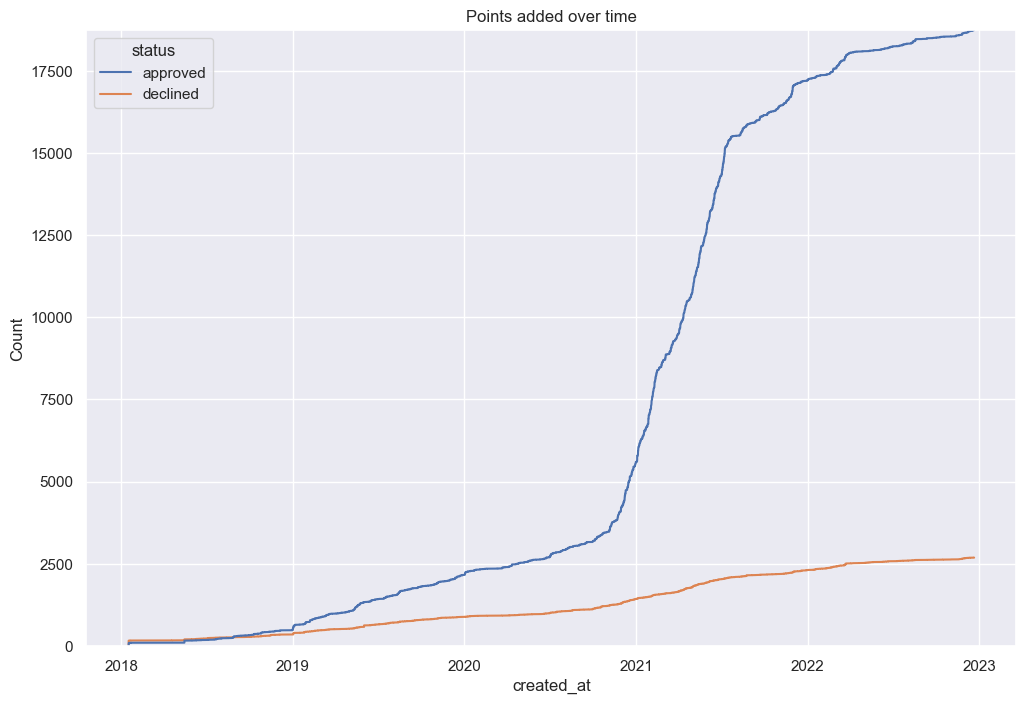

In [21]:
# How have the number of Points grown over time?
plt.figure(figsize=(12,8))
sns.ecdfplot(points, x='created_at', hue='status', stat='count')
plt.title('Points added over time')

In [22]:
# For what Services do we have the most Points? What's the distribution of Points-per-Service?

# To have human readable Service names, join the tables (drop `id` so it's not confusing, since it refers to service id)
points = pd.merge(points, cases, left_on='case_id', right_index=True, suffixes=['_point', '_case'])
points = pd.merge(points, services, left_on='service_id', right_index=True, suffixes=['_point', '_service'])
#points = points.drop('id', axis=1)

print(f"Points per Service stats:\n{points.service_id.value_counts().describe()}")
points.groupby(['service_id', 'name']).size().sort_values(ascending=False).head(15)

Points per Service stats:
count    1619.000000
mean       13.236566
std        15.486275
min         1.000000
25%         2.000000
50%         7.000000
75%        20.000000
max       103.000000
Name: service_id, dtype: float64


service_id  name                           
1553        Speedtest by Ookla                 103
219         Instagram                           96
230         PayPal                              96
2428        Prezi                               95
225         Spotify                             95
1815        Khan Academy                        92
217         Google                              90
182         Facebook                            86
2453        iFunny                              82
194         Reddit                              79
1364        Brilliant                           78
297         GitHub & Global Privacy Control     77
2120        Alibaba                             75
200         Twitch                              73
3262        Privacy                             70
dtype: int64

In [23]:
# What about approved points only?
approved_points = points[points.status == 'approved']
print(f"Approved points per Service stats:\n{approved_points.service_id.value_counts().describe()}")
approved_points.groupby(['service_id', 'name']).size().sort_values(ascending=False).head(15)

Approved points per Service stats:
count    1523.000000
mean       12.305975
std        14.036872
min         1.000000
25%         2.000000
50%         7.000000
75%        18.000000
max        89.000000
Name: service_id, dtype: float64


service_id  name                           
2428        Prezi                              89
2453        iFunny                             80
1815        Khan Academy                       79
1553        Speedtest by Ookla                 78
219         Instagram                          76
1364        Brilliant                          73
217         Google                             72
2461        Merriam-Webster                    69
2454        The Walt Disney Company            69
297         GitHub & Global Privacy Control    69
200         Twitch                             67
4521        Gettr                              67
194         Reddit                             65
2120        Alibaba                            65
3262        Privacy                            63
dtype: int64

In [24]:
# What are the distribution of Point counts per Case? What Cases have the most and least approved Points?
print(f"Points per Case stats:\n{points.case_id.value_counts().describe()}\n")
print(points.groupby(['case_id', 'title_case']).size().sort_values(ascending=False).head(15))
points.groupby(['case_id', 'title_case']).size().sort_values(ascending=False).tail(10)

Points per Case stats:
count    245.000000
mean      87.469388
std       98.480901
min        1.000000
25%       25.000000
50%       57.000000
75%      114.000000
max      893.000000
Name: case_id, dtype: float64

case_id  title_case                                                                                                         
331      There is a date of the last update of the agreements                                                                   893
152      This service is only available to users over a certain age                                                             451
286      The service is provided 'as is' and to be used at your sole risk                                                       436
163      The court of law governing the terms is in location X                                                                  344
323      You are tracked via web beacons, tracking pixels, browser fingerprinting, and/or device fingerprinting                 335
1

case_id  title_case                                                                                              
141      Inconvenient process for obtaining personal data                                                            5
240      This service will continue using anonymized user-generated content after erasure of personal information    5
494      An audio version of the Terms of Service is provided                                                        2
496      You can’t close your account if an investigation is ongoing                                                 2
491      All Traffic is unencrypted (no https)                                                                       2
495      This service is only available for commercial use                                                           1
330      The service disables software that you are not licensed to use.                                             1
309      You have the right to request lower Charges 

In [25]:
# There are quite a few Points not associated with a doc
print(f"Docless Points: {len(points[points.document_id.isna()])}")
docless_approved = points[(points.status == 'approved') & (points.document_id.isna())]
print(f"Approved docless Points: {len(docless_approved)}")
print(f"Approved docless Points grouped by Case:")
print(docless_approved.groupby(['case_id', 'title_case']).size().sort_values(ascending=False).head(10))
docless_approved.head()

Docless Points: 1593
Approved docless Points: 921
Approved docless Points grouped by Case:
case_id  title_case                                                                                            
199      The terms for this service are easy to read                                                               41
331      There is a date of the last update of the agreements                                                      26
195      You can request access, correction and/or deletion of your data                                           15
193      Your personal data is not sold                                                                            15
163      The court of law governing the terms is in location X                                                     15
128      Third-party cookies are used for advertising                                                              14
323      You are tracked via web beacons, tracking pixels, browser fingerprinting, and/or

,id_point,user_id_point,title_point,source,status,analysis,created_at_point,updated_at_point,service_id,quoteText,...,url,created_at,updated_at,wikipedia,keywords,related,slug,is_comprehensively_reviewed,user_id_service,rating
id,,,,,,,,,,,,,,,,,,,,,
4280,4280,435,easy to read,https://about.qwant.com/legal/privacy/,approved,easy to read,2018-06-09 07:47:42.197731,2018-06-26 08:51:35.009982,527,NaN,...,"qwant.com,qwantjunior.com",2018-06-09 07:31:51.624829,2021-03-25 03:19:36.108592,https://en.wikipedia.org/wiki/Qwant,None,None,qwant,True,NaN,B
4931,4931,1004,The terms for this service are easy to read,https://todoist.com/privacy,approved,,2018-11-01 22:56:15.568223,2020-11-18 16:22:42.336584,809,None,...,todoist.com,2018-11-01 22:41:52.795155,2021-03-25 03:19:38.734350,https://en.wikipedia.org/wiki/Draft:Todoist,None,None,todoist,False,NaN,C
11157,11157,20783,The service provides a complete list of all co...,https://about.deviantart.com/policy/privacy/,approved,"The Privacy Policy states, ""Please check out t...",2020-11-08 22:09:26.198844,2020-11-28 17:09:31.557934,192,None,...,deviantart.com,2018-01-16 15:26:05.686813,2021-05-14 14:37:59.267933,https://en.wikipedia.org/wiki/DeviantArt,,,deviantart,True,NaN,B
6074,6074,395,This service does not force users into binding...,https://observablehq.com/terms-of-service,approved,,2019-03-13 14:01:20.652022,2019-06-23 00:36:08.424787,1447,None,...,observablehq.com,2019-03-13 13:18:15.484146,2021-03-25 03:19:43.912348,,None,None,observable,True,NaN,D
1120,1120,7,The service uses your personal data for advert...,https://www.facebook.com/privacy/explanation,approved,"Collects all data you send (username, email, c...",2018-01-16 20:56:54.907566,2019-01-27 16:35:02.999854,182,None,...,"facebook.com,facebookwkhpilnemxj7asaniu7vnjjbi...",2018-01-16 15:26:05.533031,2022-12-13 17:42:40.937258,https://en.wikipedia.org/wiki/Facebook,social network,diaspora,facebook,True,NaN,E


/var/folders/l5/210k0yvw8xj04j001s6yhlr00000gq/T/ipykernel_57313/3733395087.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(points.quote_len[points.quote_len < 1000], ax=ax, kde=False, norm_hist=False)


Text(0.5, 1.0, 'Quote lengths (num characters)')

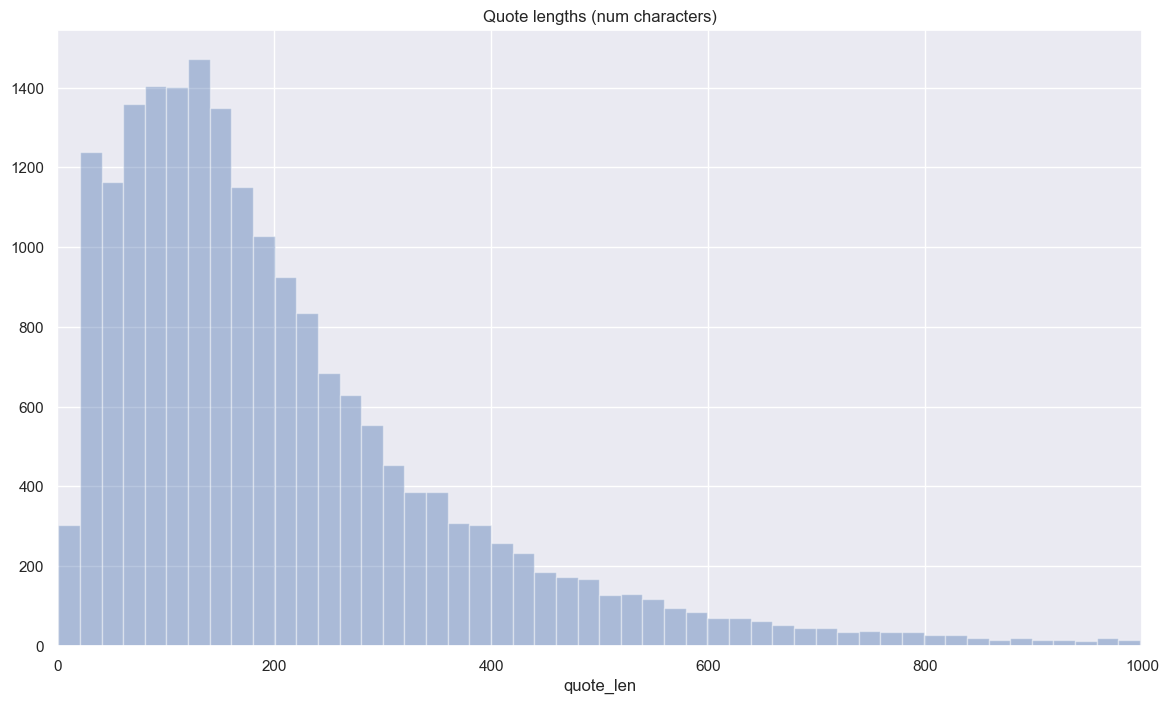

In [26]:
# What is the distribution of quote lengths?
points['quote_len'] = points.quoteEnd - points.quoteStart
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim((0,1000))
sns.distplot(points.quote_len[points.quote_len < 1000], ax=ax, kde=False, norm_hist=False)
plt.title('Quote lengths (num characters)')